$ \huge{1.}$ \
**Travelling Salesman Problem:** The travelling salesman problem states that given a set of cities and the distance between each pair of them, we are supposed to find a route through all of the cities such that we cover the minimum possible distance while also ensuring that each city is visited exactly once.

In [1]:
import numpy as np

In [2]:
distance_matrix = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")

$ \huge{4.}$ \
The required **cost()** function is created below:

In [3]:
def cost(tour):
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    distance += distance_matrix[tour[-1], tour[0]]
    return distance

$ \huge{5.}$ \
The required **neighbour()** function is created below:

In [4]:
def neighbour(tour):
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour

In [5]:
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        
        if current_cost < best_cost:
            best_state = current_state
            best_cost = current_cost
            
        
        costs.append(current_cost)
        
        
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs

$ \huge{8.}$ \
The code is implemented below:

In [6]:
import matplotlib.pyplot as plt
initial_temp=[1,5,10]
cooling_facs=[0.95,0.9,0.8]

Initial temperature:  1
Cooling Factor:  0.95
Optimal State is [ 0  1  2  4  3  6  5  9  7 10  8]
Optimal cost: 312.0


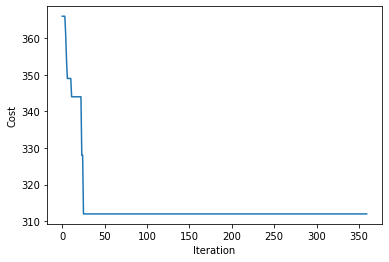

Initial temperature:  1
Cooling Factor:  0.9
Optimal State is [ 0  1  2  4  3  5  6 10  8  7  9]
Optimal cost: 342.0


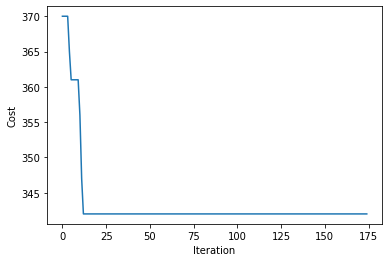

Initial temperature:  1
Cooling Factor:  0.8
Optimal State is [ 0  1  2  4  3  5  6 10  8  7  9]
Optimal cost: 342.0


<ipython-input-5-793e08610d18>:16: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


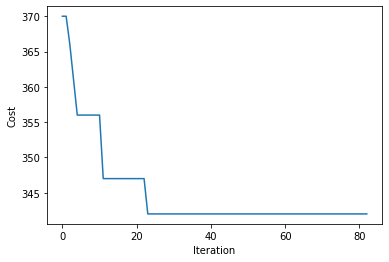

Initial temperature:  5
Cooling Factor:  0.95
Optimal State is [ 0  1  2  7  4  3  9  5  6 10  8]
Optimal cost: 283.0


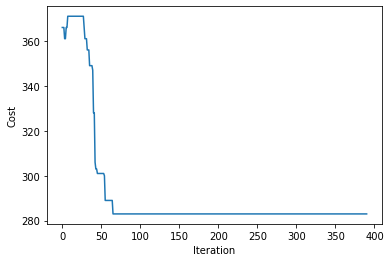

Initial temperature:  5
Cooling Factor:  0.9
Optimal State is [ 1  2  0  4  3  6  5  9  7  8 10]
Optimal cost: 315.0


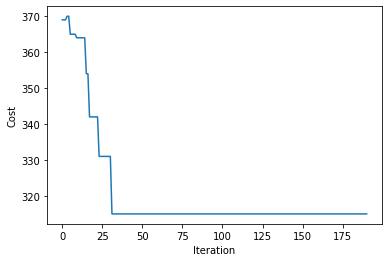

Initial temperature:  5
Cooling Factor:  0.8
Optimal State is [ 0  1  2  4  3  9  5  6 10  7  8]
Optimal cost: 289.0


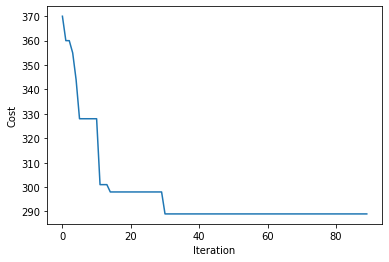

Initial temperature:  10
Cooling Factor:  0.95
Optimal State is [ 0  1  2  5  3  4  6 10  7  9  8]
Optimal cost: 340.0


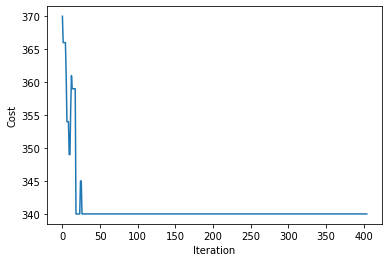

Initial temperature:  10
Cooling Factor:  0.9
Optimal State is [ 0  1  2  4  3  9  5  6 10  7  8]
Optimal cost: 289.0


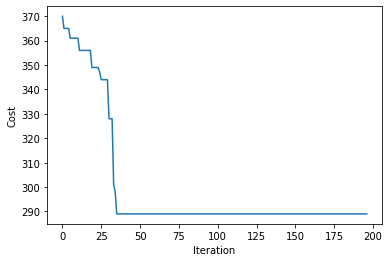

Initial temperature:  10
Cooling Factor:  0.8
Optimal State is [ 0  1  2  4  3  5  6 10  8  7  9]
Optimal cost: 342.0


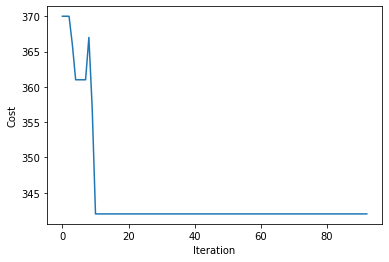

In [7]:
for temp in initial_temp:
  for alph in cooling_facs:
    print("Initial temperature: ",temp)
    print("Cooling Factor: ",alph)
    initial_state = np.arange(distance_matrix.shape[0])
    initial_temperature = temp
    cooling_factor=alph
    stopping_temperature = 1e-8

    best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

    print("Optimal State is", best_state)
    print("Optimal cost:", best_cost)

    plt.plot(costs)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

$ \huge{9.}$ \
Another cooling schedule can be of the type: \
$T_{k+1} = T_k - α$

In [8]:
def simulated_annealing1(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        
        if current_cost < best_cost:
            best_state = current_state
            best_cost = current_cost
            
        
        costs.append(current_cost)
        
        
        current_temperature = current_temperature - cooling_factor
        
    return best_state, best_cost, costs

Initial temperature:  1
Cooling Factor:  0.95
Optimal State is [ 0  1  2  3  4  5  6  7  8  9 10]
Optimal cost: 370.0


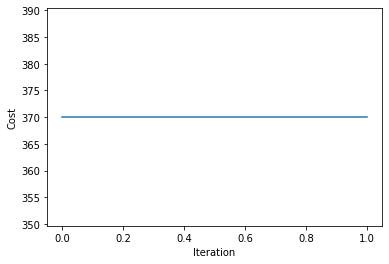

Initial temperature:  1
Cooling Factor:  0.9
Optimal State is [ 0  1  2  3  4  5  6  7  9  8 10]
Optimal cost: 360.0


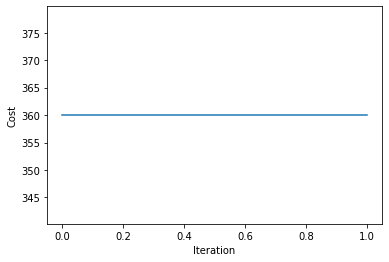

Initial temperature:  1
Cooling Factor:  0.8
Optimal State is [ 1  0  2  3  4  5  6  7  8  9 10]
Optimal cost: 369.0


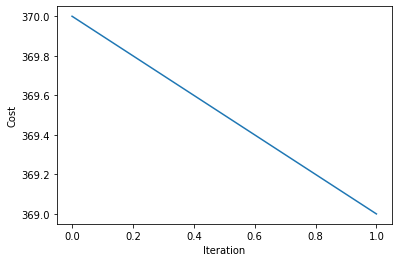

Initial temperature:  5
Cooling Factor:  0.95
Optimal State is [ 0  1  2  3  4  5  6  7 10  8  9]
Optimal cost: 361.0


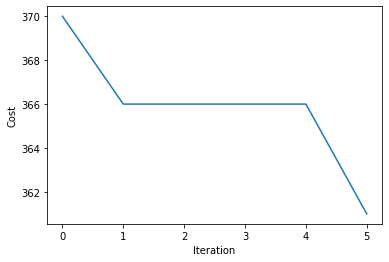

Initial temperature:  5
Cooling Factor:  0.9
Optimal State is [ 0  1  2  3  4  5  6  7  8 10  9]
Optimal cost: 366.0


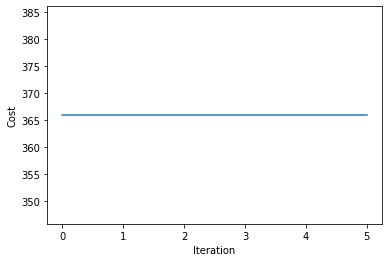

Initial temperature:  5
Cooling Factor:  0.8
Optimal State is [ 1  0  2  3  4  5  6  8  9  7 10]
Optimal cost: 365.0


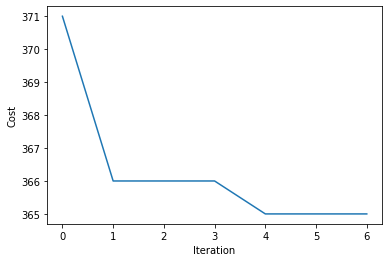

Initial temperature:  10
Cooling Factor:  0.95
Optimal State is [ 0  1  2  4  3  5  6  7  9 10  8]
Optimal cost: 344.0


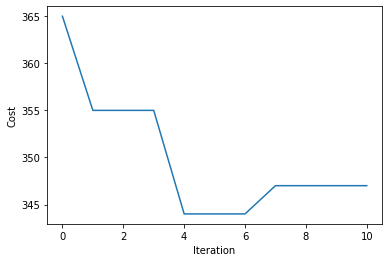

Initial temperature:  10
Cooling Factor:  0.9
Optimal State is [ 0  1  2  3  4  5  6  7  8 10  9]
Optimal cost: 366.0


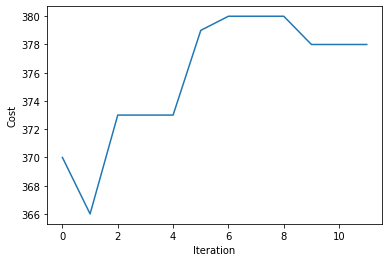

Initial temperature:  10
Cooling Factor:  0.8
Optimal State is [ 0  1  2  4  3  5  6  7  8  9 10]
Optimal cost: 365.0


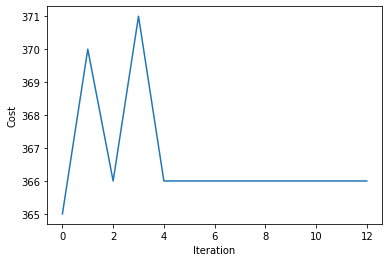

In [9]:
for temp in initial_temp:
  for alph in cooling_facs:
    print("Initial temperature: ",temp)
    print("Cooling Factor: ",alph)
    initial_state = np.arange(distance_matrix.shape[0])
    initial_temperature = temp
    cooling_factor=alph
    stopping_temperature = 1e-8

    best_state, best_cost, costs = simulated_annealing1(initial_state, initial_temperature, cooling_factor, stopping_temperature)

    print("Optimal State is", best_state)
    print("Optimal cost:", best_cost)

    plt.plot(costs)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

**Observations:** We observe that after this changed temperature update rule, we get to the optimal solution in even fewer number of iterations as compared to our original temperature change rule.

$ \huge{10.}$ \
Doing the same for **TSP48**, we get:

In [10]:
distance_matrix = np.loadtxt(open("TSP48.csv", "rb"), delimiter=",")

Initial temperature:  1
Cooling Factor:  0.95
Optimal State is [ 0  2  1  3  4  5  6  8  7  9 10 11 12 13 15 14 16 18 17 19 20 22 21 24
 25 23 29 26 27 30 32 33 28 34 31 36 35 37 39 40 41 38 42 43 46 44 47 45]
Optimal cost: 112636.0


<ipython-input-5-793e08610d18>:16: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


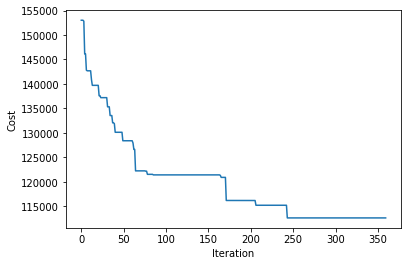

Initial temperature:  1
Cooling Factor:  0.9
Optimal State is [ 2  0  1  3  4  5  6  8  7  9 10 11 12 13 15 14 17 18 16 19 20 22 21 24
 25 23 27 26 29 31 28 32 30 33 34 36 35 37 40 38 39 42 44 41 45 43 46 47]
Optimal cost: 127497.0


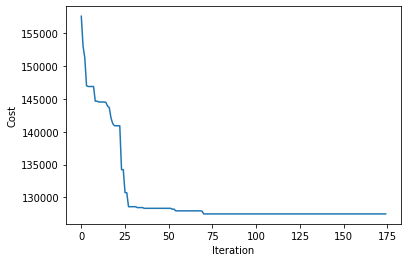

Initial temperature:  1
Cooling Factor:  0.8
Optimal State is [ 0  1  3  4  2  5  6  8  7  9 10 11 12 13 15 14 16 18 17 19 20 22 21 24
 23 25 27 26 29 28 30 32 33 31 34 35 36 37 39 38 41 40 42 43 46 44 45 47]
Optimal cost: 131435.0


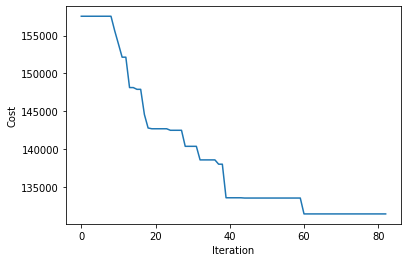

Initial temperature:  5
Cooling Factor:  0.95
Optimal State is [ 1  0  2  3  4  5  6  8  7  9 10 11 12 13 15 14 17 18 16 19 20 22 21 24
 25 23 29 26 27 30 28 33 32 34 31 42 36 35 37 39 40 38 44 41 45 43 46 47]
Optimal cost: 117255.0


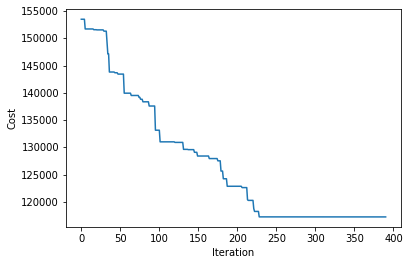

Initial temperature:  5
Cooling Factor:  0.9
Optimal State is [ 2  0  1  3  4  5  6  8  7  9 10 11 12 13 15 14 17 18 16 19 20 22 21 24
 25 23 26 27 30 28 32 29 31 34 33 35 36 37 39 40 38 41 44 42 43 45 46 47]
Optimal cost: 120142.0


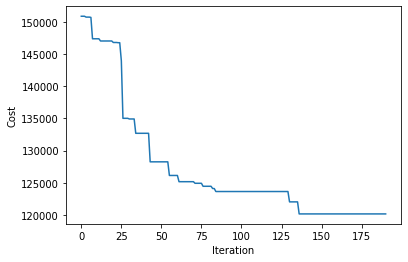

Initial temperature:  5
Cooling Factor:  0.8
Optimal State is [ 0  2  1  3  4  5  6  8  7  9 10 11 12 13 15 14 16 18 17 19 20 22 21 25
 23 24 26 27 30 28 32 29 31 34 33 36 35 37 39 40 41 38 43 42 44 47 46 45]
Optimal cost: 123122.0


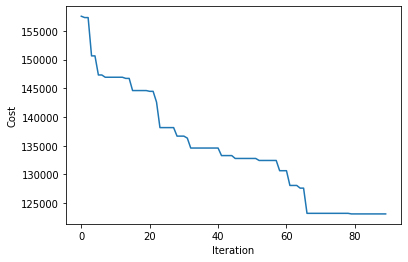

Initial temperature:  10
Cooling Factor:  0.95
Optimal State is [ 0  2  1  3  4  5  6  8  7  9 10 11 12 13 15 14 16 18 17 19 20 22 21 25
 23 24 29 26 27 31 28 32 30 33 34 36 35 37 39 38 41 40 43 42 45 47 44 46]
Optimal cost: 123330.0


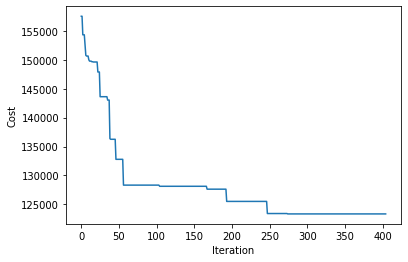

Initial temperature:  10
Cooling Factor:  0.9
Optimal State is [ 0  1  3  4  2  5  6  8  7  9 10 11 12 13 15 14 16 18 17 19 20 22 21 25
 23 24 26 27 30 28 32 29 31 34 33 35 36 37 39 38 41 40 43 42 44 47 46 45]
Optimal cost: 124207.0


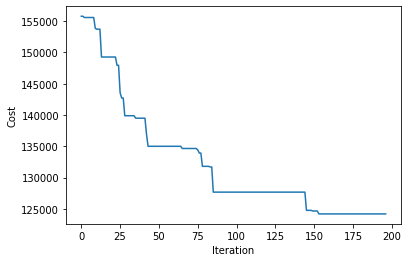

Initial temperature:  10
Cooling Factor:  0.8
Optimal State is [ 0  1  3  4  2  5  6  8  7  9 10 11 12 13 15 14 16 18 17 19 20 22 21 25
 23 24 26 27 30 28 29 32 31 34 33 35 36 37 39 40 41 38 42 43 45 44 46 47]
Optimal cost: 127111.0


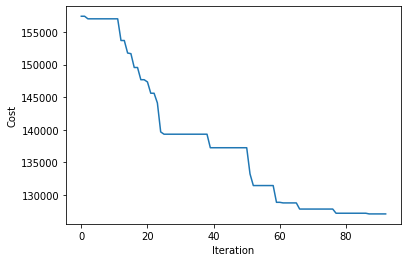

In [11]:
for temp in initial_temp:
  for alph in cooling_facs:
    print("Initial temperature: ",temp)
    print("Cooling Factor: ",alph)
    initial_state = np.arange(distance_matrix.shape[0])
    initial_temperature = temp
    cooling_factor=alph
    stopping_temperature = 1e-8

    best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

    print("Optimal State is", best_state)
    print("Optimal cost:", best_cost)

    plt.plot(costs)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

Now for $T_{k+1} = T_k - α$

Initial temperature:  1
Cooling Factor:  0.95
Optimal State is [ 1  0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Optimal cost: 153514.0


<ipython-input-8-b62dc5a9e1fd>:16: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


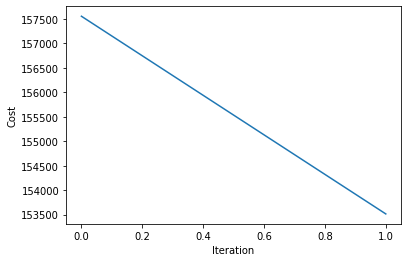

Initial temperature:  1
Cooling Factor:  0.9
Optimal State is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Optimal cost: 153013.0


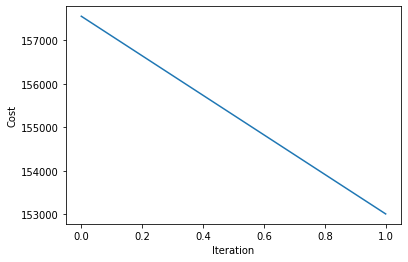

Initial temperature:  1
Cooling Factor:  0.8
Optimal State is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 45 47]
Optimal cost: 157352.0


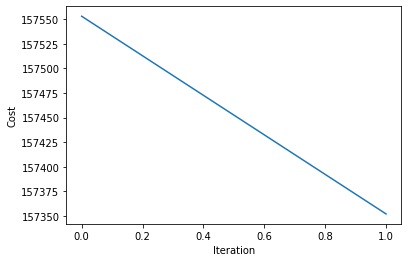

Initial temperature:  5
Cooling Factor:  0.95
Optimal State is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 31 33 34 35 36 37 38 39 40 41 42 44 43 45 46 47]
Optimal cost: 154094.0


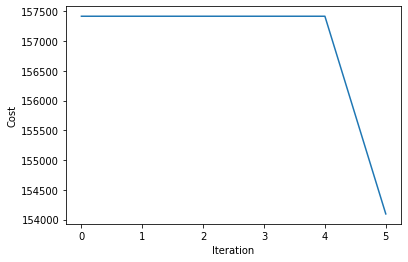

Initial temperature:  5
Cooling Factor:  0.9
Optimal State is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 45 47]
Optimal cost: 152907.0


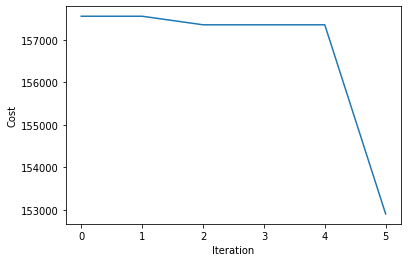

Initial temperature:  5
Cooling Factor:  0.8
Optimal State is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Optimal cost: 157553.0


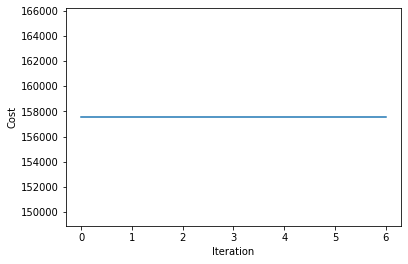

Initial temperature:  10
Cooling Factor:  0.95
Optimal State is [ 0  1  3  2  4  5  6  7  8  9 10 11 12 13 14 15 17 16 18 19 20 21 22 24
 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 42 44 45 46 47]
Optimal cost: 148474.0


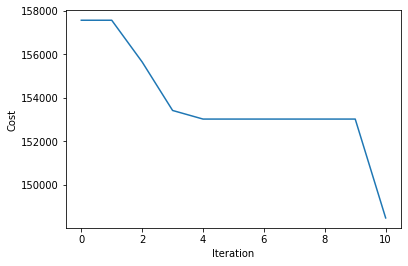

Initial temperature:  10
Cooling Factor:  0.9
Optimal State is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 17 19 20 22 21 24
 25 23 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Optimal cost: 150687.0


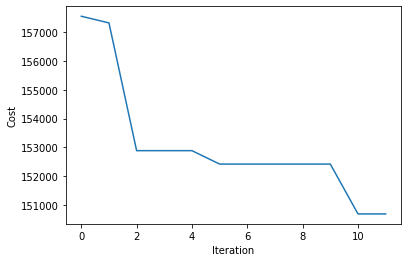

Initial temperature:  10
Cooling Factor:  0.8
Optimal State is [ 0  2  1  3  4  5  6  8  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 29 31 32 33 34 35 36 37 39 38 40 41 42 44 43 45 46 47]
Optimal cost: 147687.0


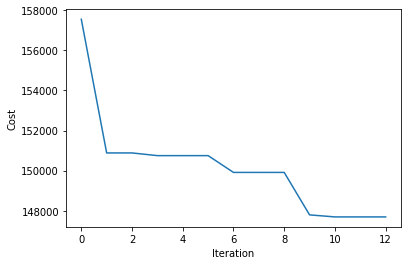

In [12]:
for temp in initial_temp:
  for alph in cooling_facs:
    print("Initial temperature: ",temp)
    print("Cooling Factor: ",alph)
    initial_state = np.arange(distance_matrix.shape[0])
    initial_temperature = temp
    cooling_factor=alph
    stopping_temperature = 1e-8

    best_state, best_cost, costs = simulated_annealing1(initial_state, initial_temperature, cooling_factor, stopping_temperature)

    print("Optimal State is", best_state)
    print("Optimal cost:", best_cost)

    plt.plot(costs)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()